Dilakukan import dataset dari ICU ML

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

Dilihat info dari dataset, terlihat bahwa ada 8 fitur masing masing berisi 4177 dan tidak ada null, Sex bertipe object dan sisanya bertipe float

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.2+ KB


In [5]:
X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


Dilihat bahwa target(y) juga tidak ada yang null dan memiliki tipe int untuk menunjukkan Rings yang dimiliki Abalone

In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rings   4177 non-null   int64
dtypes: int64(1)
memory usage: 32.8 KB


## Exploratory Data Analysis

### Penanganan Outliers

Dilakukan pengecekan outliers pada tiap fitur dengan tipe float

<Axes: xlabel='Length'>

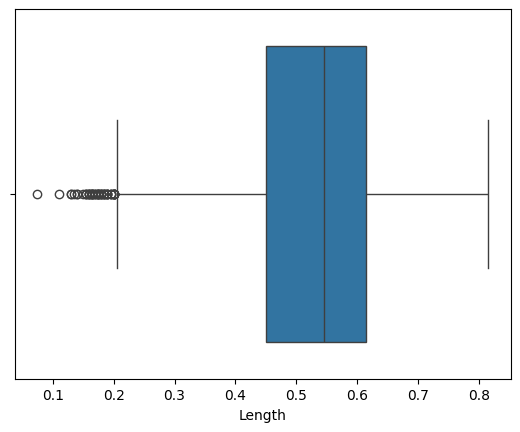

In [7]:
sns.boxplot(x=X['Length'])

<Axes: xlabel='Diameter'>

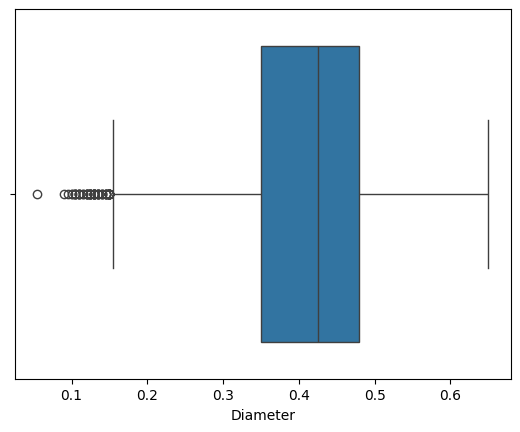

In [8]:
sns.boxplot(x=X['Diameter'])

<Axes: xlabel='Height'>

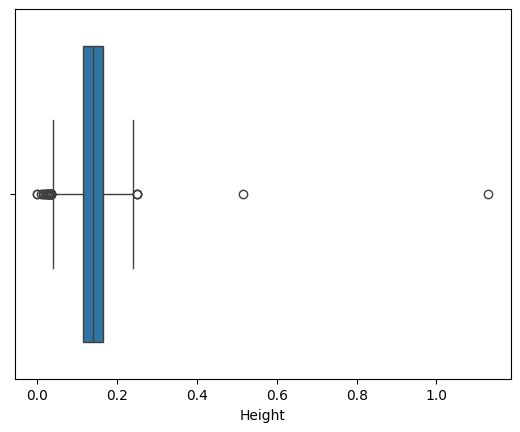

In [9]:
sns.boxplot(x=X['Height'])

<Axes: xlabel='Whole_weight'>

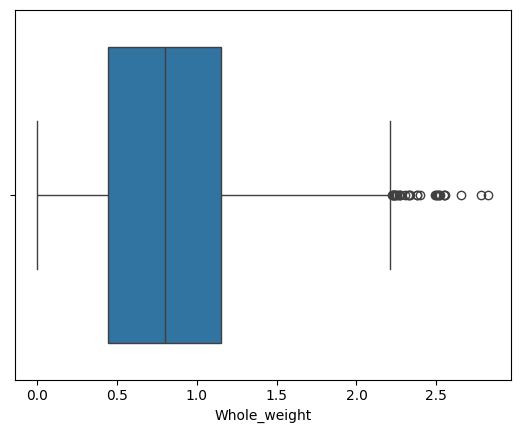

In [10]:
sns.boxplot(x=X['Whole_weight'])

<Axes: xlabel='Shucked_weight'>

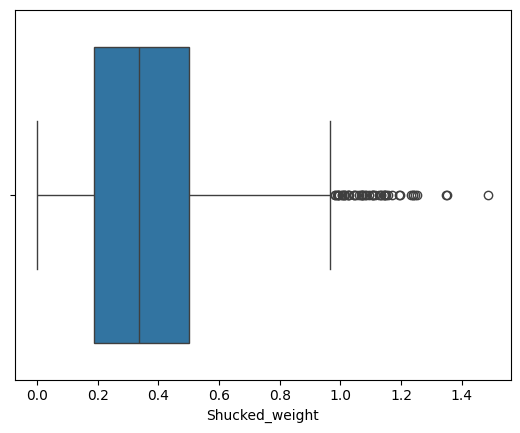

In [11]:
sns.boxplot(x=X['Shucked_weight'])

<Axes: xlabel='Viscera_weight'>

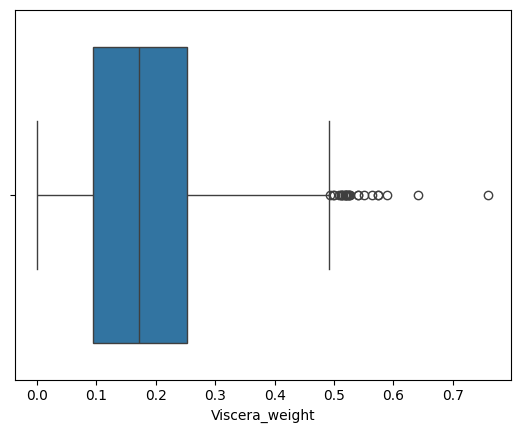

In [12]:
sns.boxplot(x=X['Viscera_weight'])

<Axes: xlabel='Shell_weight'>

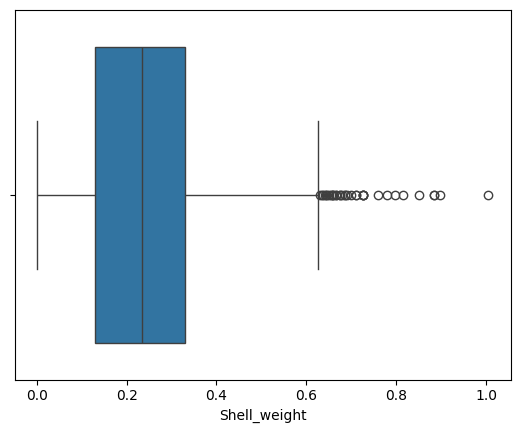

In [13]:
sns.boxplot(x=X['Shell_weight'])

Terlihat ada beberapa outliers sehingga perlu dilakukan penanganan terlebih dahulu

In [14]:
#Menggabungkan X dan y terlebih dahulu
columns = ['Length',	'Diameter',	'Height',	'Whole_weight',	'Shucked_weight',	'Viscera_weight',	'Shell_weight', 'Rings']

df = pd.concat([X,y], axis=1)
for column in columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR=Q3-Q1
  df=df[~((df[column]<(Q1-1.5*IQR))|(df[column]>(Q3+1.5*IQR)))]



# Cek ukuran dataset setelah kita drop outliers
df.shape

(3773, 9)

Terlihat bahwa sudah ada beberapa baris outliers yang berhasil dihapus sehingga jumlah data berubah dari 4177 instances menjadi 3773 instances

In [15]:
# Pisah jadi X feature dan y target
X=df.drop(['Rings'], axis=1)
y=df['Rings']

### Univariate Analysis



Dilakukan univariate analysis terhadap:
- fitur numerical yaitu 'Length',	'Diameter',	'Height',	'Whole_weight',	'Shucked_weight',	'Viscera_weight',	'Shell_weight'
- fitur categorical yaitu 'Sex'

In [16]:
numerical_features = ['Length',	'Diameter',	'Height',	'Whole_weight',	'Shucked_weight',	'Viscera_weight',	'Shell_weight']
categorical_features = ['Sex']


Dibuat histogram untuk setiap fitur numerical

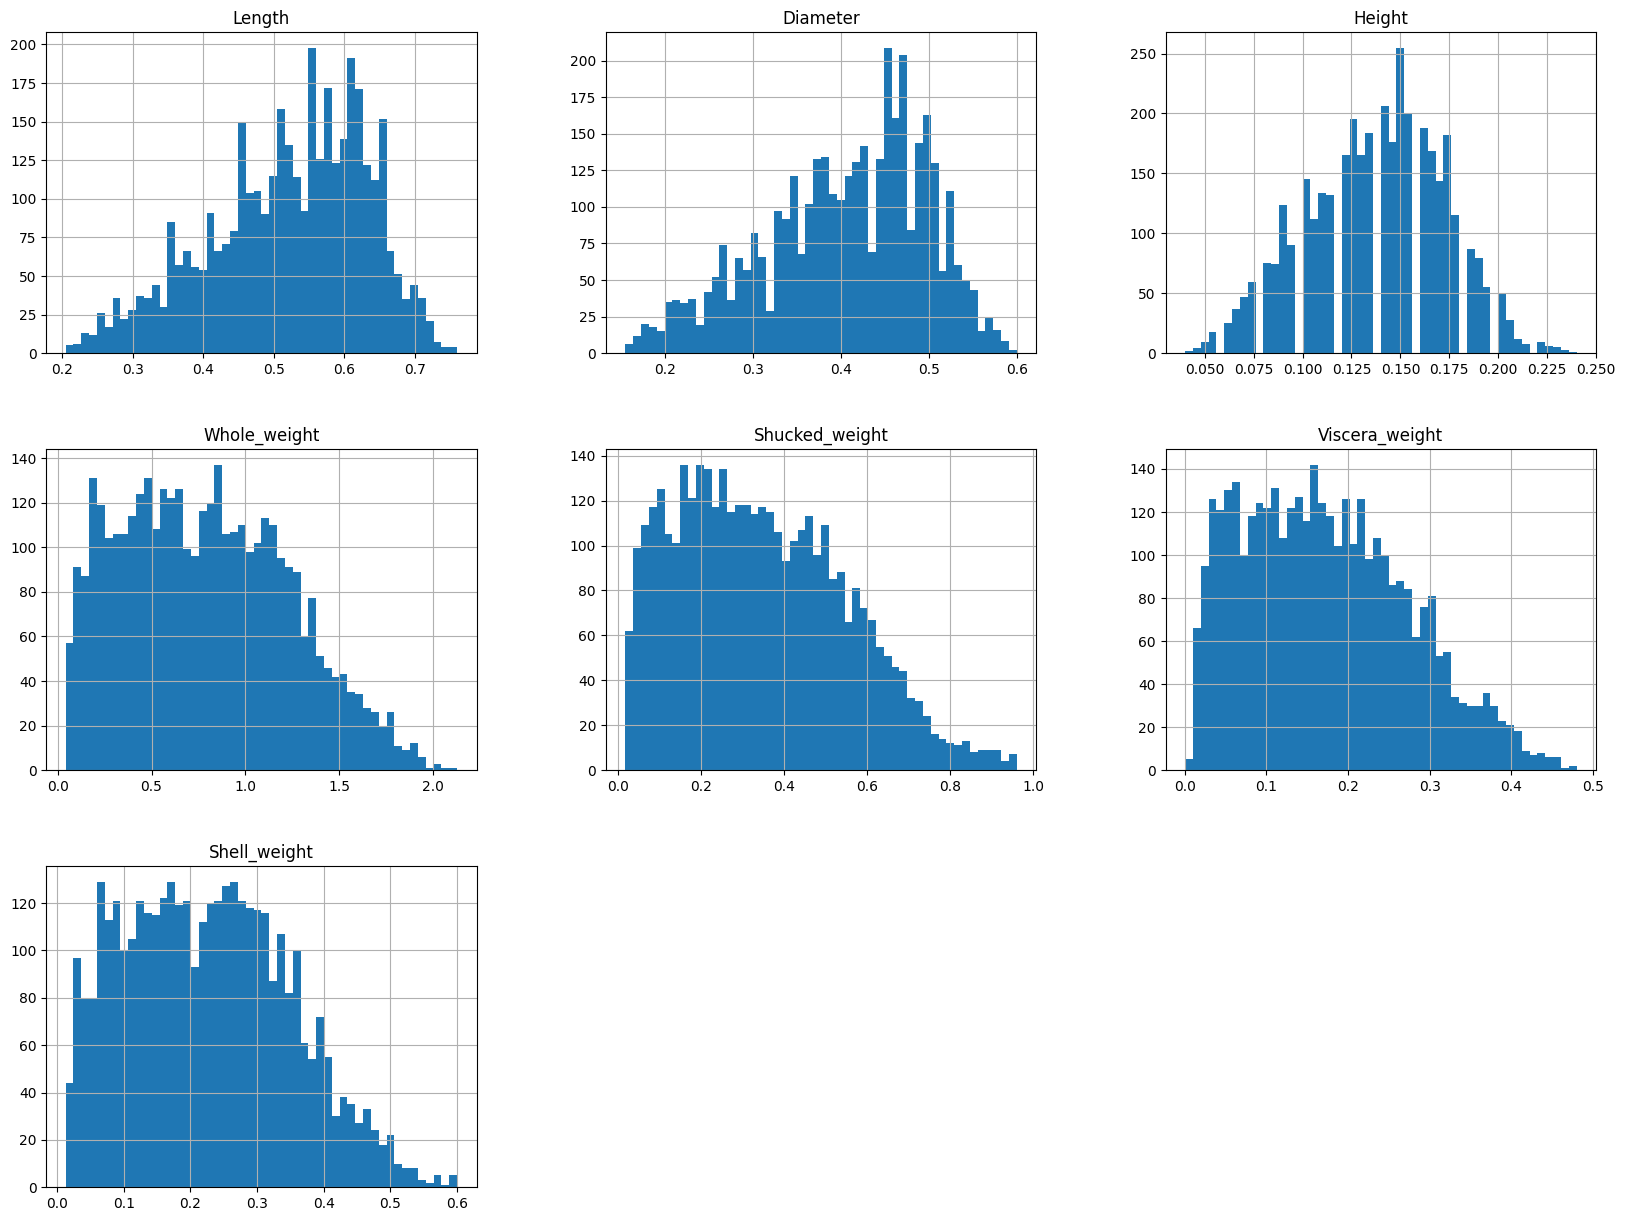

In [17]:
import matplotlib.pyplot as plt

X[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

Dan juga diliat histogram untuk target

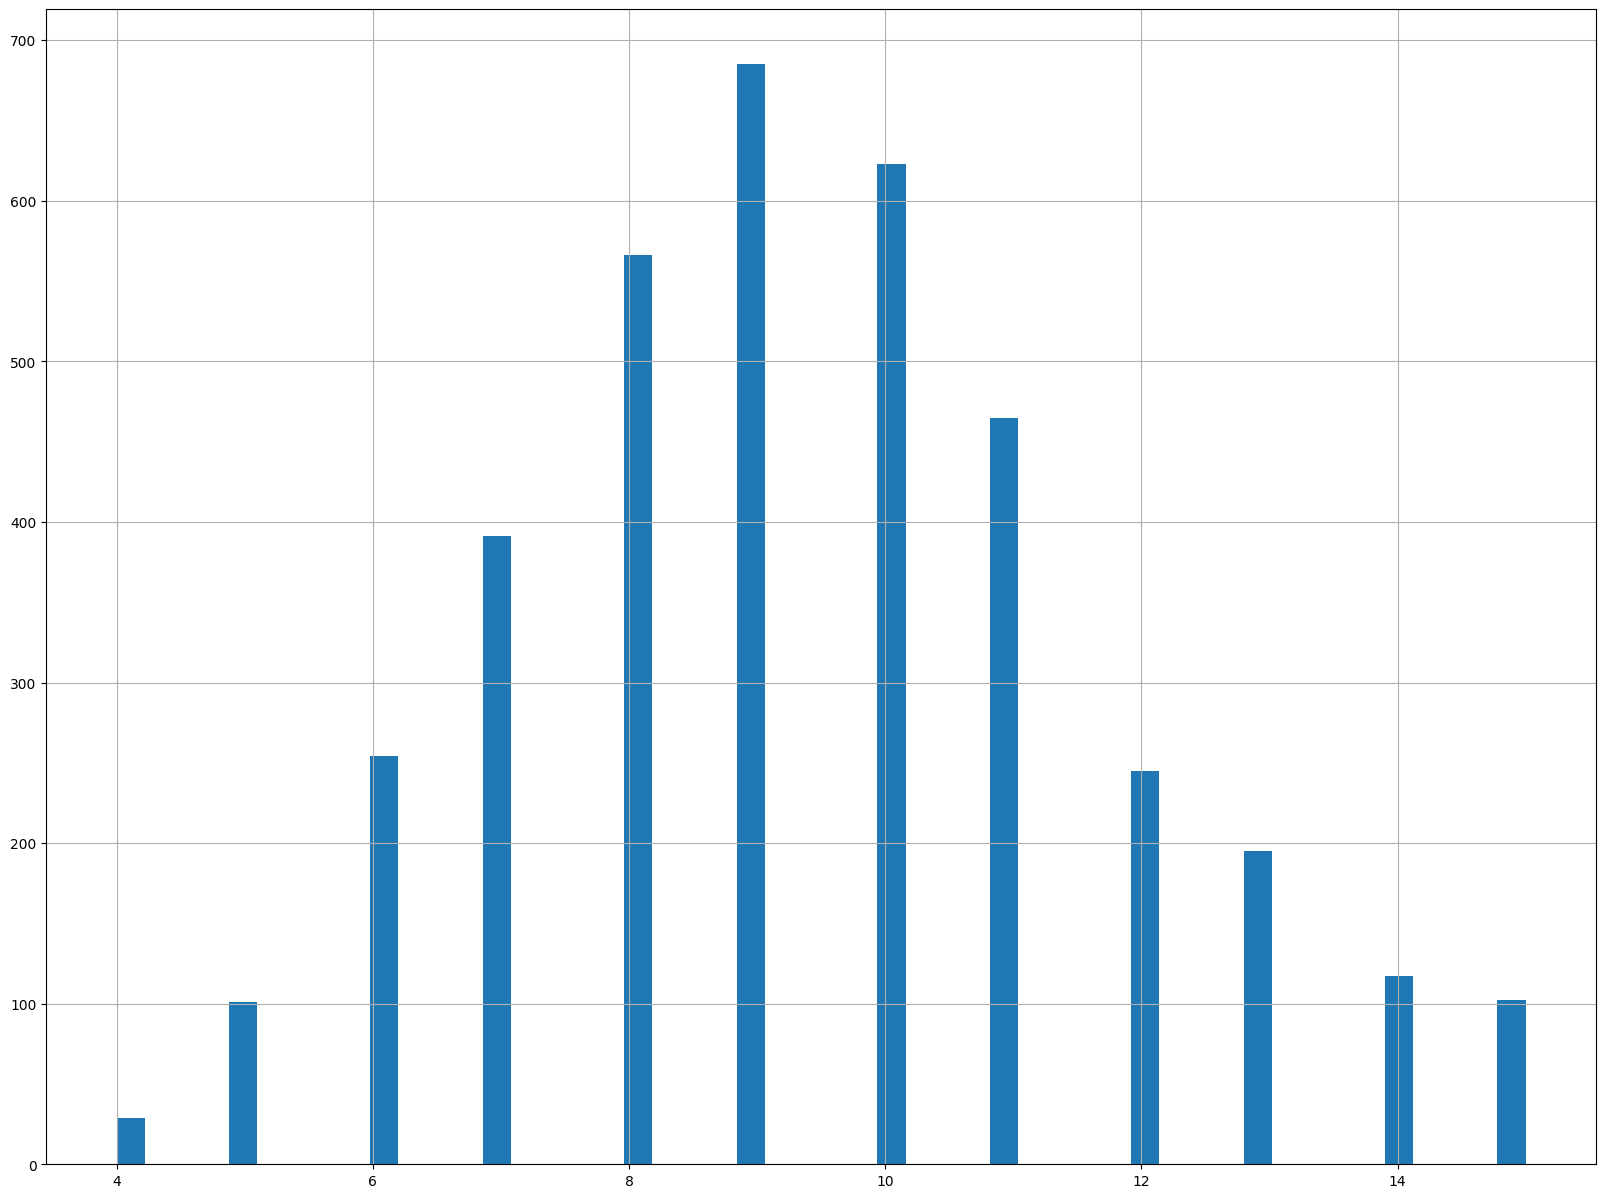

In [18]:
y.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram, ditemukan bahwa:
- Length dan Diameter, juga Whole_Weight, Viscera_Weight, Shucked_Weight, dan Shell Weight memiliki grafik yang mirip hal ini dapat menunjukkan korelasi yang tinggi antara fitur tersebut
- Target memiliki distribusi normal dengan kebanyakan berada pada rentang 8 sampai 10

Kemudian dilihat juga bar plot untuk categorical feature 'Sex'

     jumlah sampel  persentase
Sex                           
M             1359        36.0
I             1261        33.4
F             1153        30.6


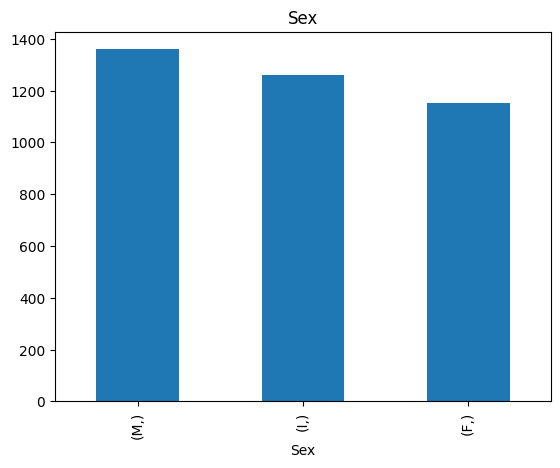

In [19]:
count = X[categorical_features].value_counts()
percent = 100*X[categorical_features].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=categorical_features, subplots=True);

Dapat dilihat bahwa kebanyakan data memiliki 'Sex' Male, diikuti dengan Infant, dan terakhir Female

### Multivariate Analysis

Kemudian dilakukan multivariate analysis antara target 'Rings' dengan fitur 'Sex'

<ipython-input-20-2751d9da02f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y=y, kind="bar", dodge=False, height = 4, aspect = 3,  data=X, palette="Set3")


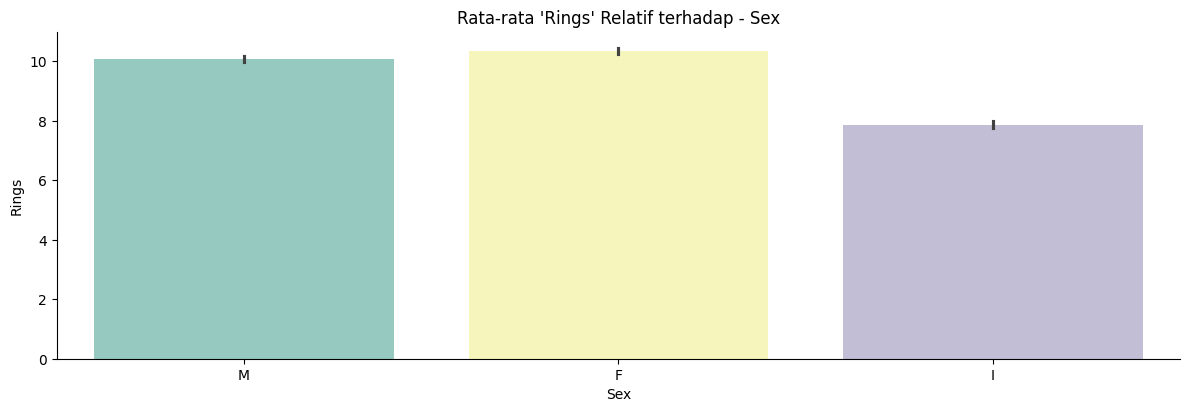

In [20]:
cat_features = X.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y=y, kind="bar", dodge=False, height = 4, aspect = 3,  data=X, palette="Set3")
  plt.title("Rata-rata 'Rings' Relatif terhadap - {}".format(col))

Dapat dilihat bahwa Female memiliki rata-rata Rings paling tinggi, diikuti dengan Male

## Data Preparation

### One-Hot Encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder
X = pd.concat([X, pd.get_dummies(X['Sex'], prefix='Sex')],axis=1)
X.drop(['Sex'], axis=1, inplace=True)
X.replace({False: 0, True: 1}, inplace=True)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [22]:
import pandas as pd

### Reduksi Dimensi PCA

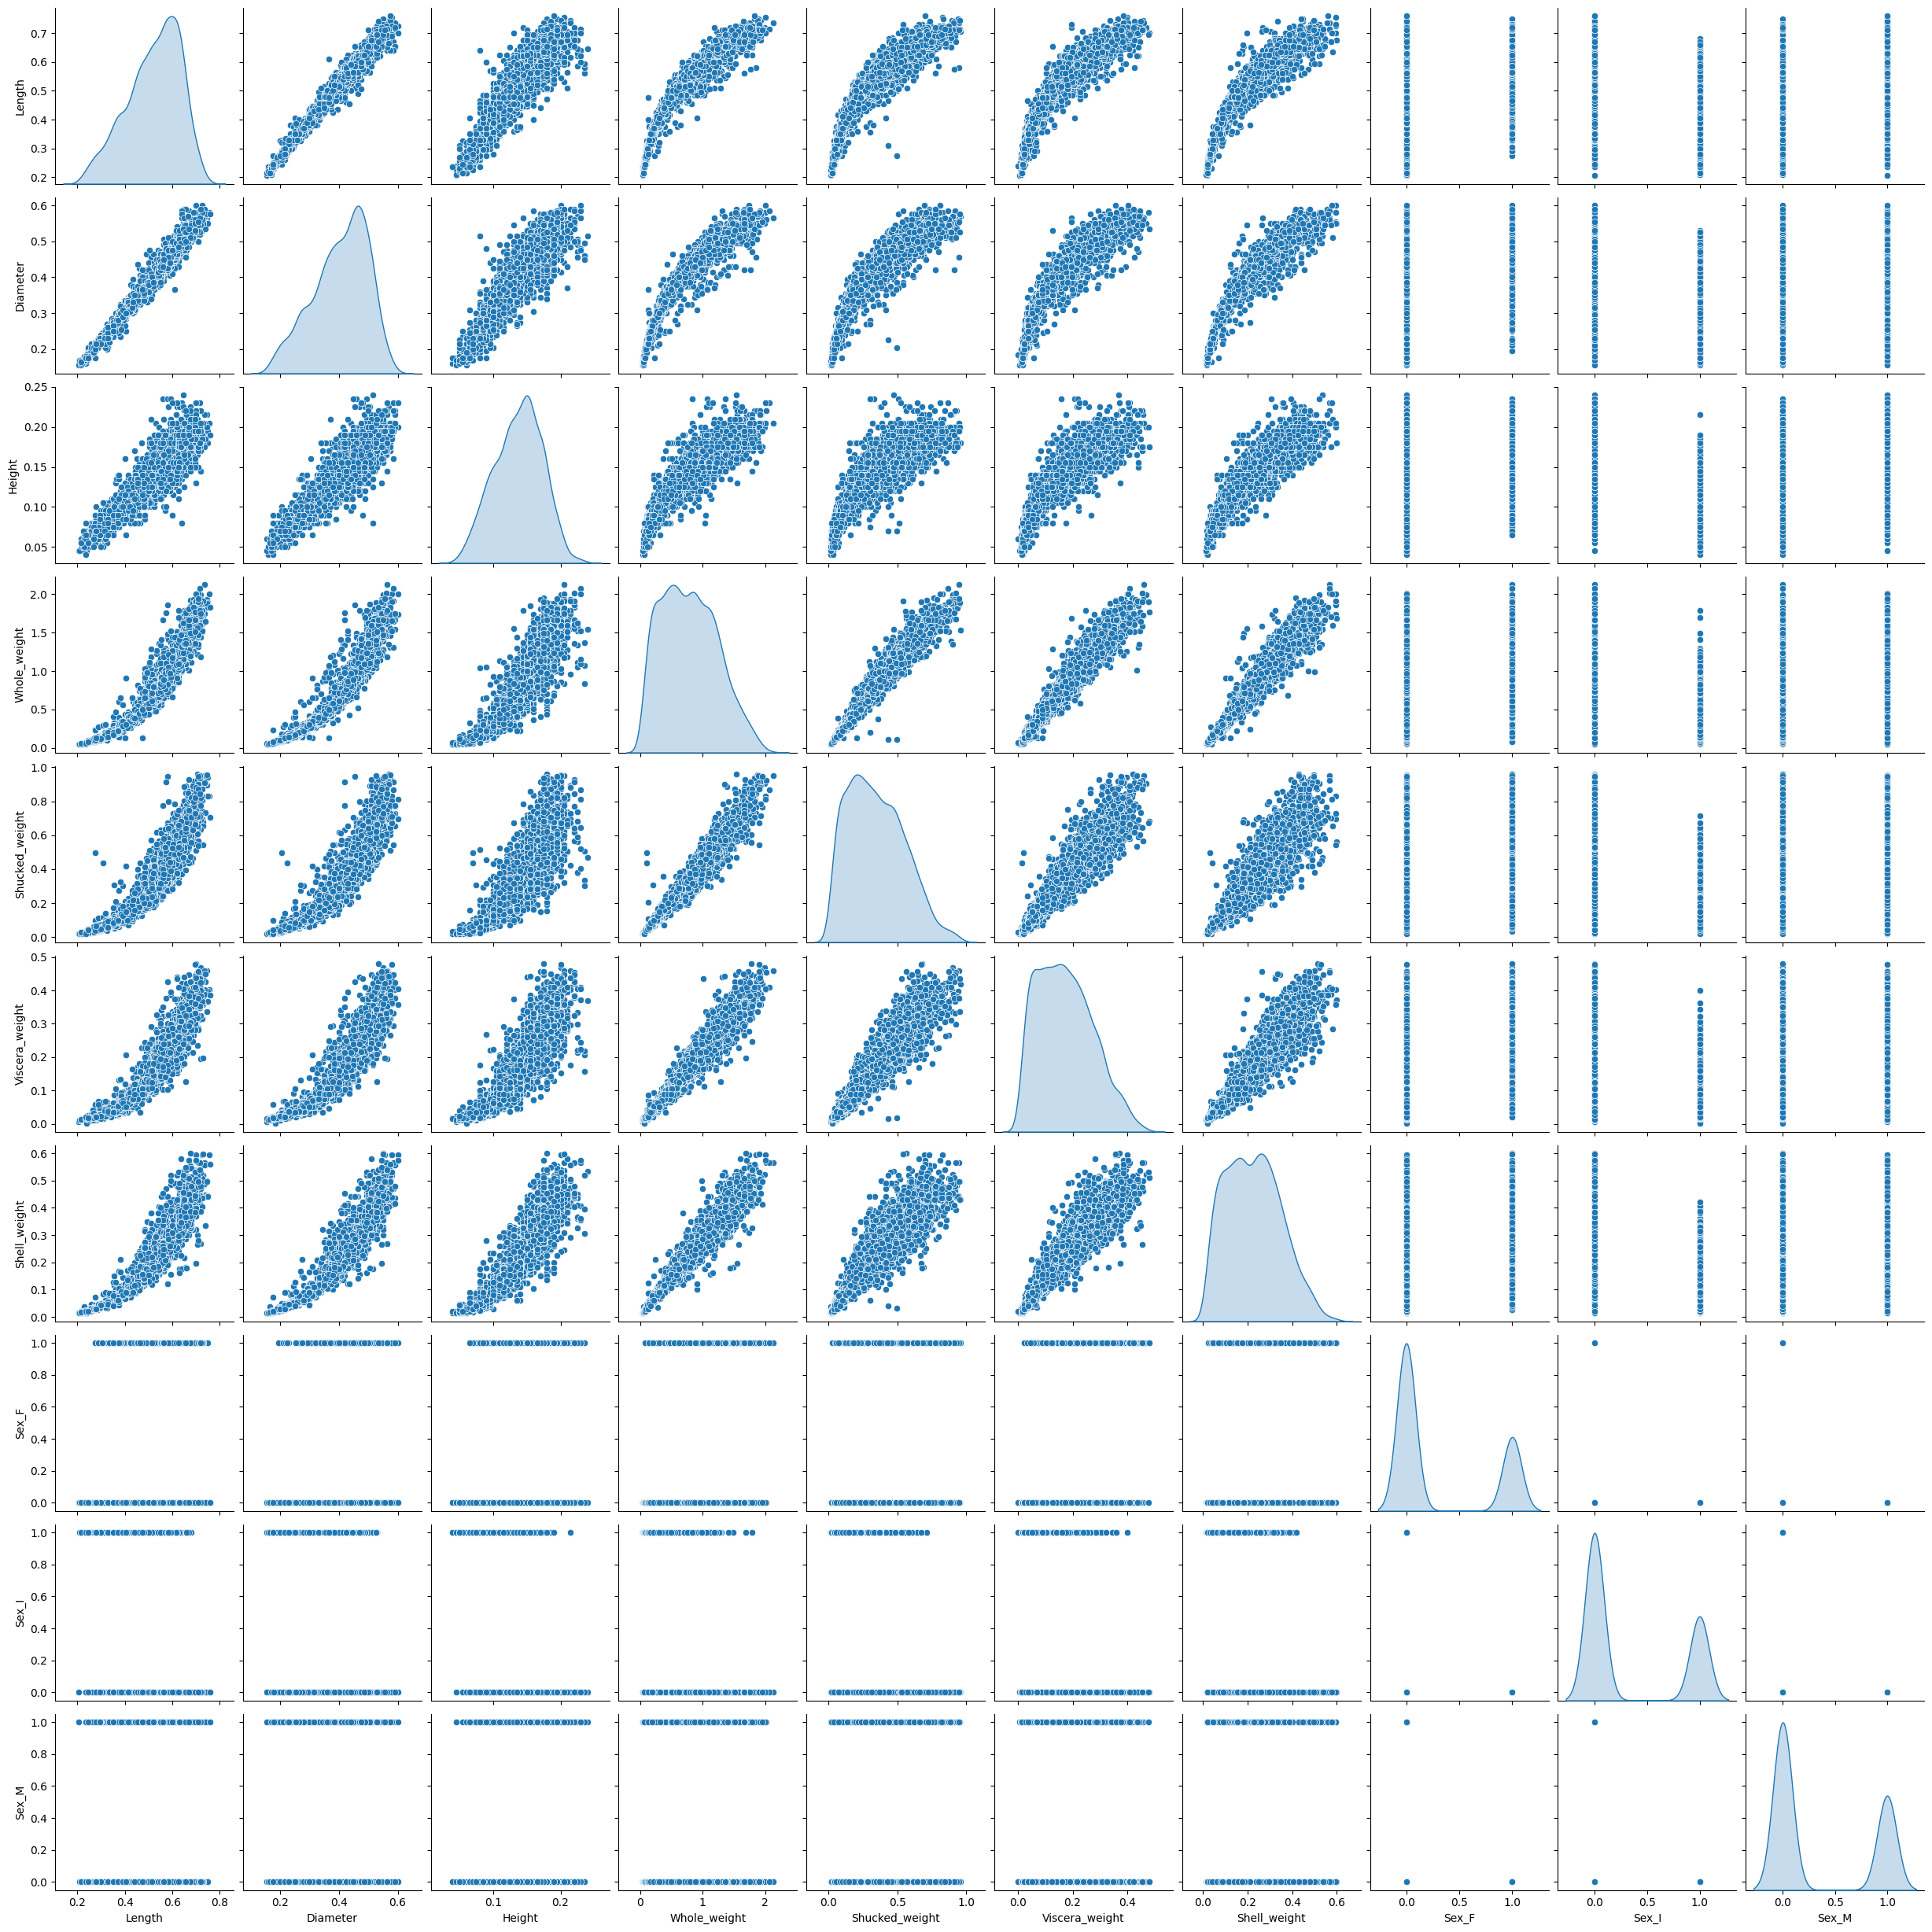

In [23]:
sns.pairplot(X, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

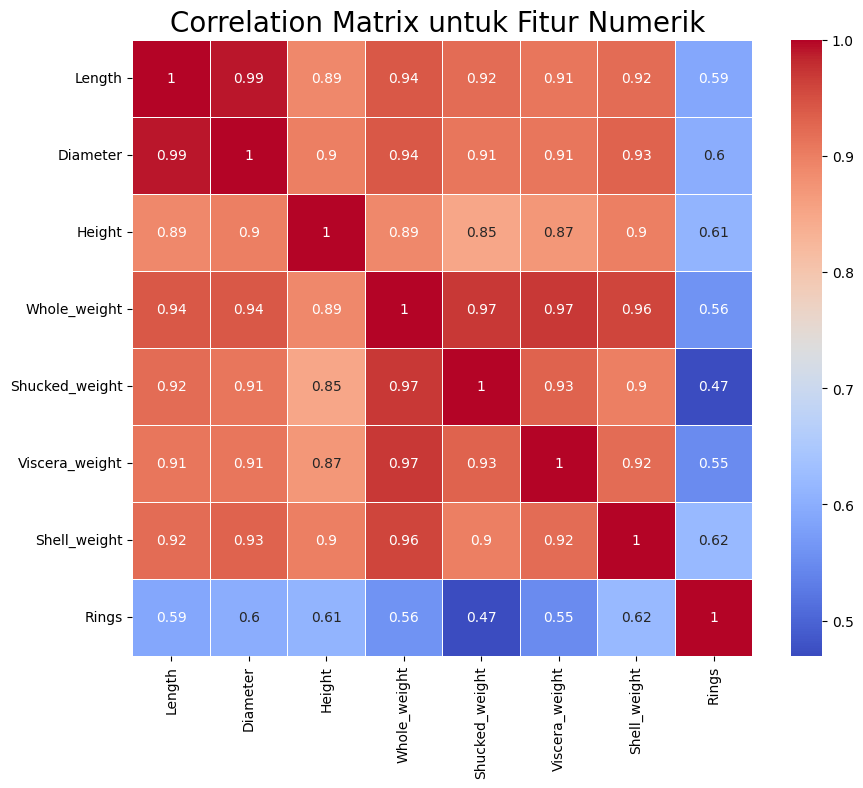

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = pd.concat([X[numerical_features], y], axis=1).corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dapat dilihat dari koerlasi matrix bahwa Diameter dan Length memiliki korelasi yang sangat tinggi yaitu 0.99, karena keduanya menunjukkan ukuran dari Abalone. Sama halnya dengan fitur mengenai Whole_Weight, Shucked_Weight, Viscera_Weight, dan Shell_Weight karena mereka semua merupakan data yang berhubungan dengan berat dari Abalone

Pada proyek ini, dilakukan reduksi dimensi hanya untuk fitur 'Diameter' dan 'Length' saja seperti berikut

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(X[['Diameter', 'Length']])
princ_comp = pca.transform(X[['Diameter', 'Length']])

In [26]:
pca.explained_variance_ratio_.round(3)

array([0.993, 0.007])

Dapat dilihat bahwa sebanyak ~99% informasi berada pada PC pertama dan sisanya pada PC kedua

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(X[['Diameter', 'Length']])
X['dimension'] = pca.transform(X.loc[:, ('Diameter', 'Length')]).flatten()
X.drop(['Diameter', 'Length'], axis=1, inplace=True)

### Train-Test-Split

Dataset dibagi menjadi data latih (train data) dan data uji (test data) dengan rasio 80:20

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

In [29]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3773
Total # of sample in train dataset: 3018
Total # of sample in test dataset: 755


Dilakukan standarisasi pada train data agar standar deviasi sama dengan 1 dan mean sama dengan 0

In [30]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['dimension',	'Height',	'Whole_weight',	'Shucked_weight',	'Viscera_weight',	'Shell_weight']

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,dimension,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
2977,0.818031,-1.061673,-0.774014,-0.461851,-0.907433,-1.054125
453,-0.610162,0.496274,0.293617,0.277831,0.447300,0.232829
2000,1.483958,-0.920042,-1.173674,-1.008040,-1.204090,-1.245539
1669,-0.740468,0.637905,0.625919,0.662367,0.763735,0.436461
4004,0.049816,-0.353516,-0.476514,-0.449605,-0.472336,-0.459520


In [31]:
X_train[numerical_features].describe().round(4)

,dimension,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,3018.0000,3018.0000,3018.0000,3018.0000,3018.0000,3018.0000
mean,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000
std,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002
min,-2.0282,-2.7613,-1.6755,-1.6179,-1.7183,-1.7383
25%,-0.7834,-0.7784,-0.8127,-0.8194,-0.8283,-0.8250
50%,-0.1501,0.0714,-0.0555,-0.0994,-0.0842,-0.0400
75%,0.6658,0.7795,0.7244,0.7114,0.7044,0.7093
max,2.7008,2.9040,2.9947,2.9965,3.0233,3.0429


Kemudian dilakukan juga standarisasi pada test data

In [32]:
scaler = StandardScaler()
scaler.fit(X_test[numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_test[numerical_features].head()

,dimension,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
3059,-1.068248,0.545995,0.905891,0.746102,0.917595,1.126495
3108,1.303805,-1.610753,-1.277032,-1.229428,-1.319979,-1.254097
3567,-0.580742,0.114646,0.354048,0.371258,0.156412,0.410210
2010,0.802171,-0.460487,-0.997618,-0.917902,-0.870420,-1.064493
3864,1.822986,-2.042102,-1.480772,-1.429514,-1.498780,-1.443702


In [33]:
X_test[numerical_features].describe().round(4)

,dimension,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,755.0000,755.0000,755.0000,755.0000,755.0000,755.0000
mean,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000
std,1.0007,1.0007,1.0007,1.0007,1.0007,1.0007
min,-1.9333,-2.6172,-1.7043,-1.6372,-1.6725,-1.7386
25%,-0.8316,-0.7481,-0.7921,-0.7963,-0.7989,-0.8306
50%,-0.1330,0.1146,-0.0779,-0.1176,-0.1092,-0.0491
75%,0.6522,0.8336,0.7772,0.7081,0.7081,0.7473
max,2.7993,2.7027,2.7337,3.0661,2.9457,3.0225


## Model Development

Dilakukan pengembangan model menggunakan KNN, Random Forest, dan Boosting Algorithm, dan juga digunakan MSE untuk evaluasi

In [34]:
models = pd.DataFrame(index=['knn', 'RandomForest', 'Boosting'],
                      columns=['train_mse', 'test_mse'])

### K-Nearest Neighbor (KNN)

Digunakan pembuatan model KNN menggunakan train data dengan n=15, kemudian dievaluasi menggunakan Mean Squared Error

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

models.loc['knn', 'train_mse'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)
models.loc['knn', 'test_mse'] = mean_squared_error(y_pred = knn.predict(X_test), y_true=y_test)

### Random Forest

Digunakan pembuatan model Random Forest menggunakan train data dengan n_estimators=50, max_depth=8, n_jobs=-1, kemudian dievaluasi menggunakan Mean Squared Error

In [36]:
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=8, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['RandomForest','train_mse'] = mean_squared_error(y_pred = RF.predict(X_train), y_true=y_train)
models.loc['RandomForest', 'test_mse'] = mean_squared_error(y_pred = RF.predict(X_test), y_true=y_test)


### Boosting Algorithm

Digunakan pembuatan model Boosting menggunakan train data dengan learning_rate=0.08, kemudian dievaluasi menggunakan Mean Squared Error

In [37]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.08, random_state=55)
boosting.fit(X_train, y_train)
models.loc['Boosting','train_mse'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)
models.loc['Boosting', 'test_mse'] = mean_squared_error(y_pred = boosting.predict(X_test), y_true=y_test)


## Hasil

Hasil dari evaluasi model dapat dilihat seperti berikut

In [68]:
models

,train_mse,test_mse
knn,2.309799,2.870605
RandomForest,1.475024,2.735989
Boosting,2.774085,3.10315


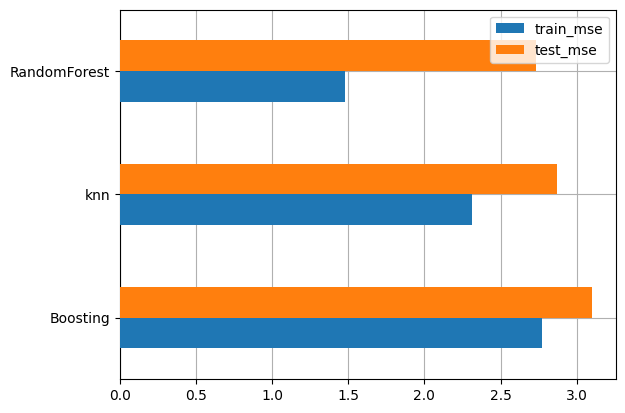

In [67]:
fig, ax = plt.subplots()
models.sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dapat dilihat bahwa hasil terbaik merupakan model Random Forest yang memiliki MSE paling sedikit pada train data dan test data. Tetapi selisih antara train_mse dan test_mse besar sehingga ada kemungkinan bahwa model mengalami over-fitting